In [ ]:

# from gensumm.evaluation_summarization import evaluate_document_summaries, plot_method_comparison

# file_path = r"D:\Aakash\python Projects\Major Project\Major-Project\Multilingual-Extractive-Summarization-\data\testing_article_for_genSumm.pdf"

# reference_summary = """
# Artificial Intelligence (AI) is transforming modern work by automating routine tasks, boosting efficiency, 
# and supporting decision-making across industries. While automation raises concerns about job displacement, 
# AI more often shifts workers toward higher-value roles that require creativity, empathy, and complex problem-solving. 
# AI augments human abilities in fields such as manufacturing, healthcare, finance, and logistics. 
# However, adapting to this shift requires stronger digital skills, continuous learning, and ethical governance 
# to ensure responsible and fair AI deployment.
# """

# for model in [
#     "facebook/bart-large-cnn",
#     "google/pegasus-xsum",
#     "google/pegasus-cnn_dailymail",
#     "google/flan-t5-base",
# ]:
#     print(f"\n=== Testing abstractive model: {model} ===")
#     results = evaluate_document_summaries(
#         file_path=file_path,
#         reference_summary=reference_summary,
#         lang="en",
#         compression_ratio=0.2,
#         max_cap=40,
#         min_sentences=3,
#         lambda_param=0.7,
#         abs_model_name=model,
#     )
    
# print("Metric results per method:")
# for method, metric_dict in results.items():
#     if method == "_summaries":
#         continue
#     print(f"\n=== {method.upper()} ===")
#     for k, v in metric_dict.items():
#         print(f"{k}: {v}")

# plot_method_comparison(results)

import sys
sys.path.insert(0, r"d:\Aakash\python Projects\Major Project\Major-Project\Multilingual-Extractive-Summarization-")

: 

In [27]:
import importlib
import gensumm.dataset_eval
importlib.reload(gensumm.dataset_eval)

from gensumm.dataset_eval import evaluate_on_dataset


[Eval] Running metrics on device: cpu


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [28]:
import inspect
from gensumm.dataset_eval import evaluate_on_dataset

print(inspect.getsource(evaluate_on_dataset))


def evaluate_on_dataset(
    dataset_name: str,
    dataset_config: str = None,
    num_samples: int = 100,
    abs_model_name: str = "google/flan-t5-base",
    compression_ratio=0.2,
    lambda_param=0.7,
    max_cap=40,
    min_sentences=3,
    export_csv="results.csv",
):

    print(f"\n🔍 Loading Dataset: {dataset_name} ({dataset_config})")
    ds = load_dataset(dataset_name, dataset_config)

    data = ds["test"].select(range(min(num_samples, len(ds["test"]))))

    # Abstractive model (GPU)
    abs_model = AbstractiveSummarizer(abs_model_name)

    rows = []

    for idx, item in enumerate(data):
        print(f"\n📝 Processing sample {idx+1}/{len(data)}")

        doc = item["text"]
        ref = item["summary"]

        # --------------------------------------------
        # 1) Split into sentences
        # --------------------------------------------
        sents = split_sentences(doc)
        if len(sents) < 2:
            continue

        n = len(sents)
        target = in

In [ ]:
import sys
print(sys.executable)


d:\Aakash\Conda\envs\gensumm\python.exe


In [1]:
# results = evaluate_on_dataset(
#     dataset_name="csebuetnlp/xlsum",
#     dataset_config="english",
#     num_samples=100,
#     abs_model_name="google/flan-t5-base",
#     export_csv="xlsum_results.csv"
# )

import torch
print("CUDA available:", torch.cuda.is_available())
print("CUDA device count:", torch.cuda.device_count())
print("GPU name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "None")

CUDA available: True
CUDA device count: 1
GPU name: NVIDIA GeForce RTX 3050 Laptop GPU


In [1]:
from gensumm.dataset_eval import evaluate_on_dataset

results = evaluate_on_dataset(
    dataset_name="csebuetnlp/xlsum",
    dataset_config="english",
    num_samples=500,
    abs_model_name="./flan_t5_xlsum_finetuned_lora",  # ← your fine-tuned model dir
    export_csv="xlsum_results_updated_scoring.csv"
)

# from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

# m = AutoModelForSeq2SeqLM.from_pretrained("google/flan-t5-base")
# print("Model loaded OK")


d:\Aakash\Conda\envs\gensumm\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\utils\generic.py:441: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(
d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\utils\generic.py:309: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(
d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\utils\generic.py:309: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytr

[Embedding] Using device: cuda


d:\Aakash\Conda\envs\gensumm\lib\site-packages\huggingface_hub\file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\utils\generic.py:309: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(


[Embedder] Loaded on device: cuda:0
[Eval] Running metrics on device: cuda


d:\Aakash\Conda\envs\gensumm\lib\site-packages\huggingface_hub\file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



🔍 Loading Dataset: csebuetnlp/xlsum (english)


Using the latest cached version of the dataset since csebuetnlp/xlsum couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'english' at C:\Users\Aakash Borse\.cache\huggingface\datasets\csebuetnlp___xlsum\english\2.0.0\30fece425f9a3866e04321773ca7a80056d55ca6 (last modified on Wed Dec 10 14:25:36 2025).


[ABS] Using device: cuda

📝 Processing sample 1/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 2/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 3/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 4/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 5/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 6/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 7/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 8/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 9/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 10/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 11/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 12/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 13/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 14/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 15/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 16/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 17/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 18/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 19/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 20/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 21/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 22/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 23/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 24/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 25/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 26/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 27/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 28/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 29/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 30/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 31/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 32/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 33/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 34/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 35/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 36/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 37/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 38/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 39/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 40/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 41/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 42/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 43/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 44/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 45/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 46/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 47/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 48/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 49/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 50/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 51/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 52/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 53/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 54/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 55/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 56/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 57/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 58/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 59/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 60/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 61/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 62/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 63/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 64/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 65/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 66/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 67/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 68/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 69/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 70/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 71/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 72/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 73/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 74/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 75/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 76/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 77/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 78/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 79/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 80/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 81/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 82/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 83/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 84/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 85/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 86/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 87/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 88/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 89/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 90/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 91/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 92/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 93/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 94/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 95/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 96/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 97/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 98/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 99/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 100/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 101/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 102/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 103/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 104/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 105/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 106/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 107/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 108/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 109/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 110/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 111/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 112/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 113/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 114/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 115/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 116/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 117/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 118/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 119/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 120/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 121/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 122/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 123/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 124/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 125/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 126/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 127/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 128/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 129/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 130/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 131/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 132/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 133/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 134/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 135/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 136/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 137/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 138/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 139/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 140/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 141/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 142/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 143/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 144/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 145/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 146/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 147/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 148/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 149/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 150/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 151/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 152/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 153/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 154/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 155/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 156/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 157/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 158/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 159/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 160/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 161/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 162/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 163/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 164/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 165/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 166/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 167/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 168/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 169/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 170/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 171/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 172/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 173/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 174/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 175/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 176/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 177/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 178/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 179/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 180/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 181/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 182/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 183/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 184/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 185/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 186/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 187/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 188/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 189/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 190/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 191/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 192/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 193/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 194/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 195/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 196/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 197/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 198/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 199/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 200/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 201/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 202/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 203/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 204/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 205/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 206/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 207/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 208/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 209/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 210/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 211/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 212/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 213/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 214/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 215/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 216/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 217/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 218/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 219/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 220/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 221/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 222/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 223/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 224/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 225/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 226/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 227/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 228/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 229/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 230/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 231/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 232/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 233/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 234/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 235/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 236/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 237/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 238/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 239/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 240/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 241/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 242/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 243/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 244/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 245/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 246/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 247/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 248/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 249/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 250/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 251/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 252/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 253/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 254/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 255/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 256/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 257/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 258/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 259/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 260/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 261/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 262/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 263/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 264/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 265/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 266/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 267/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 268/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 269/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 270/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 271/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 272/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 273/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 274/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 275/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 276/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 277/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 278/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 279/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 280/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 281/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 282/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 283/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 284/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 285/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 286/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 287/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 288/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 289/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 290/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 291/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 292/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 293/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 294/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 295/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 296/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 297/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 298/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 299/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 300/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 301/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 302/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 303/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 304/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 305/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 306/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 307/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 308/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 309/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 310/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 311/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 312/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 313/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 314/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 315/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 316/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 317/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 318/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 319/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 320/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 321/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 322/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 323/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 324/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 325/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 326/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 327/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 328/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 329/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 330/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 331/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 332/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 333/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 334/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 335/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 336/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 337/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 338/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 339/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 340/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 341/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 342/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 343/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 344/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 345/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 346/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 347/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 348/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 349/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 350/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 351/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 352/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 353/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 354/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 355/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 356/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 357/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 358/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 359/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 360/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 361/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 362/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 363/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 364/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 365/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 366/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 367/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 368/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 369/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 370/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 371/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 372/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 373/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 374/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 375/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 376/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 377/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 378/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 379/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 380/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 381/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 382/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 383/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 384/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 385/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 386/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 387/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 388/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 389/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 390/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 391/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 392/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 393/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 394/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 395/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 396/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 397/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 398/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 399/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 400/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 401/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 402/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 403/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 404/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 405/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 406/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(



📝 Processing sample 407/500


d:\Aakash\Conda\envs\gensumm\lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(


KeyboardInterrupt: 

⚠️ 'results' not found — loading from CSV instead.
Loaded results from xlsum_results.csv


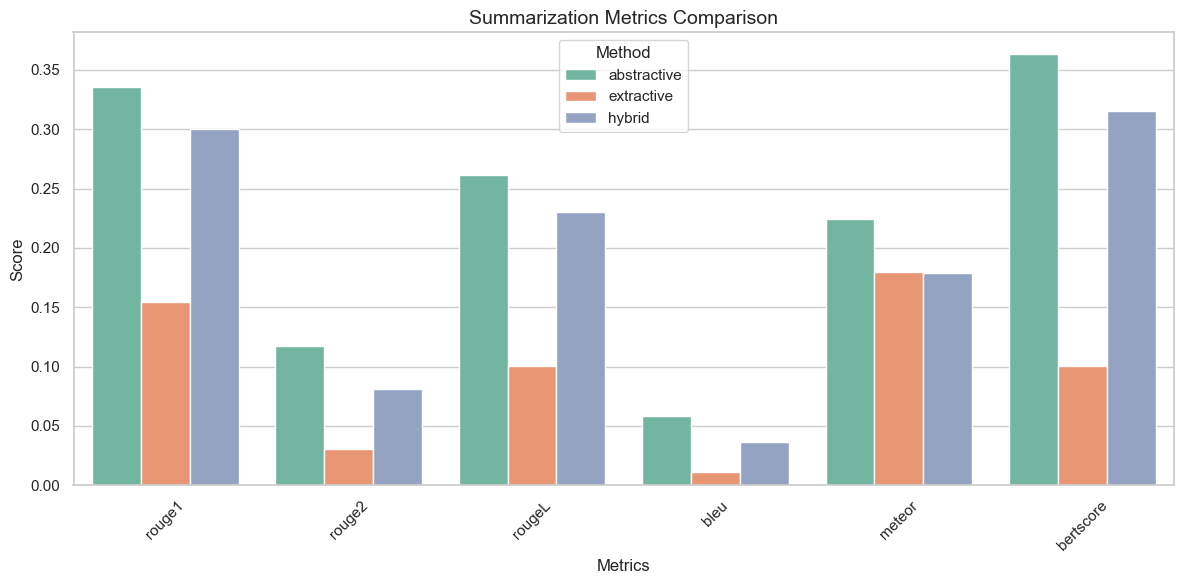

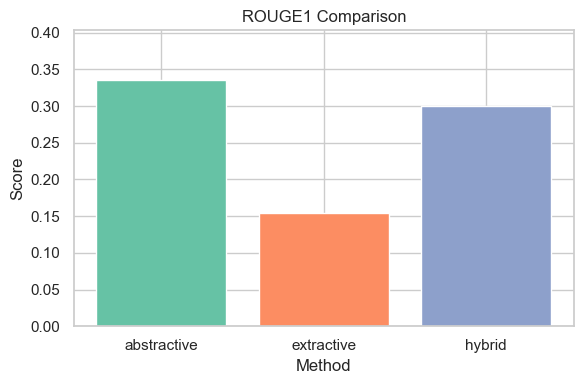

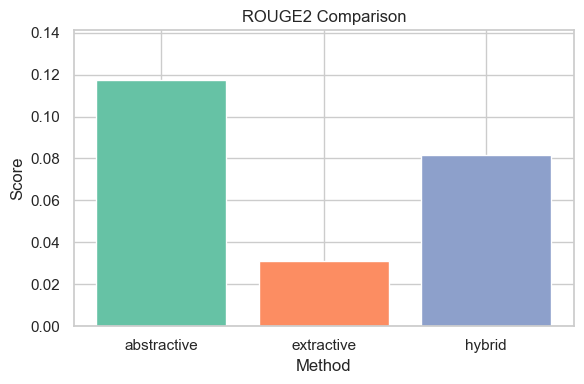

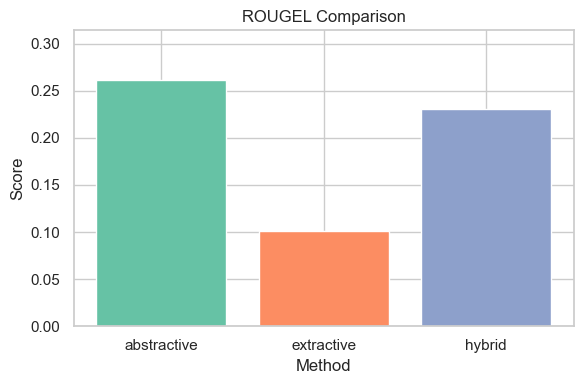

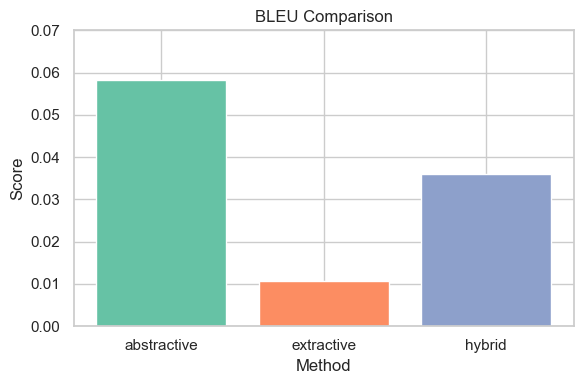

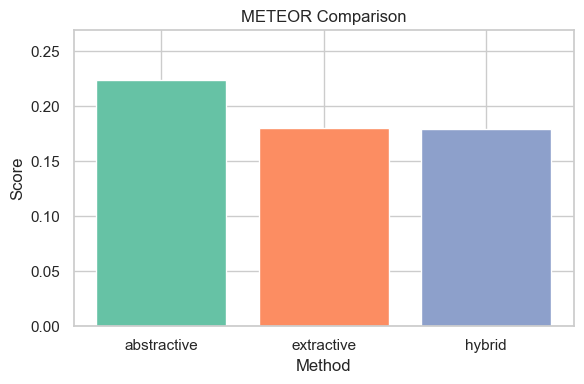

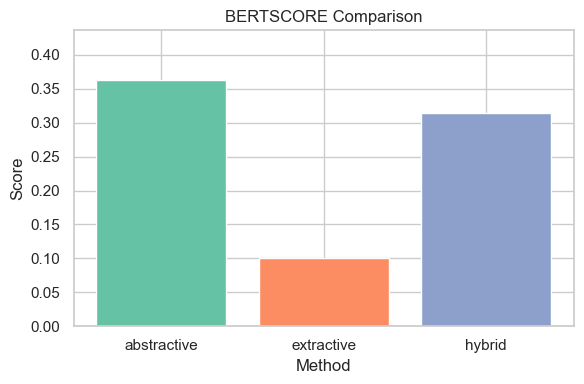

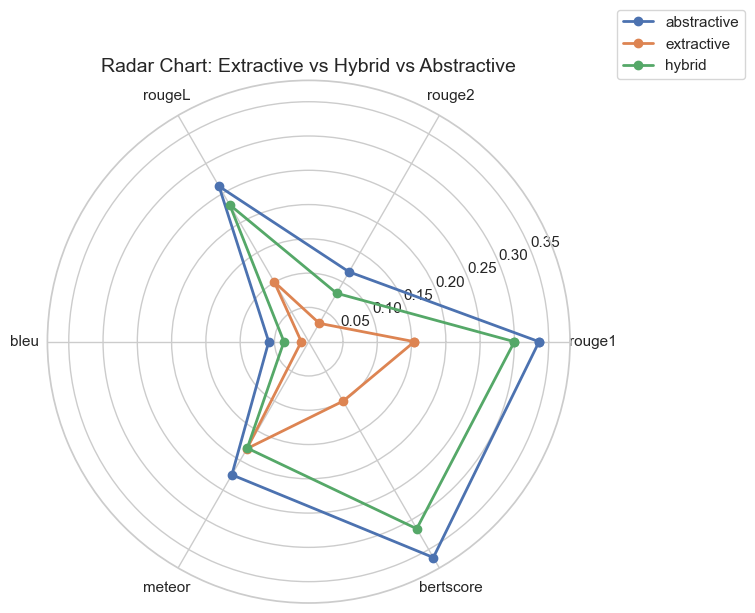

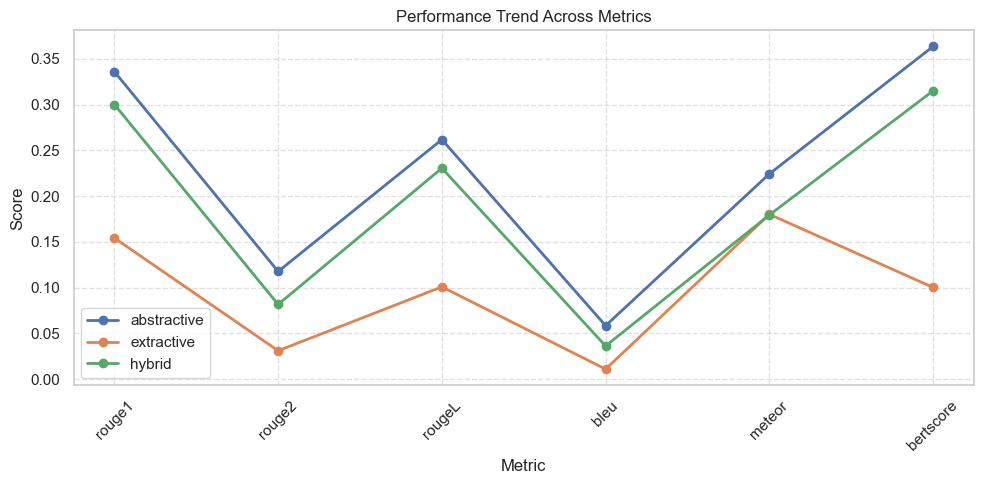

In [1]:
%matplotlib inline

# =======================================
#   📊 COMPLETE PLOTTING SUITE
#   Extractive vs Hybrid vs Abstractive
# =======================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Try to load results from memory; if not, load CSV
try:
    df = results["df"]
    print("Loaded results from memory.")
except Exception:
    print("⚠️ 'results' not found — loading from CSV instead.")
    df = pd.read_csv("xlsum_results.csv")
    print("Loaded results from xlsum_results.csv")

# Compute aggregate metrics
agg = df.groupby("method").mean(numeric_only=True)

metrics = ["rouge1", "rouge2", "rougeL", "bleu", "meteor", "bertscore"]
methods = list(agg.index)

sns.set(style="whitegrid")
plt.rcParams["figure.autolayout"] = True


# ---------------------------------------
# 1. BAR PLOT – Compare All Metrics
# ---------------------------------------
plt.figure(figsize=(12,6))
df_melt = agg[metrics].reset_index().melt(
    id_vars="method",
    var_name="metric",
    value_name="score"
)

sns.barplot(
    data=df_melt,
    x="metric",
    y="score",
    hue="method",
    palette="Set2",
    errorbar=None
)

plt.title("Summarization Metrics Comparison", fontsize=14)
plt.xlabel("Metrics")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(title="Method")
plt.show()


# ---------------------------------------
# 2. INDIVIDUAL BAR CHARTS (per metric)
# ---------------------------------------
for m in metrics:
    plt.figure(figsize=(6,4))
    plt.bar(methods, agg[m], color=["#66c2a5", "#fc8d62", "#8da0cb"])
    
    plt.title(f"{m.upper()} Comparison")
    plt.ylabel("Score")
    plt.xlabel("Method")
    plt.ylim(0, max(agg[m])*1.2 if agg[m].max() > 0 else 1)
    plt.show()


# ---------------------------------------
# 3. RADAR (SPIDER) CHART
# ---------------------------------------
angles = np.linspace(0, 2 * np.pi, len(metrics), endpoint=False).tolist()
angles += angles[:1]

plt.figure(figsize=(8,8))

for method in methods:
    values = agg.loc[method][metrics].tolist()
    values += values[:1]
    plt.polar(angles, values, marker="o", linewidth=2, label=method)

plt.xticks(angles[:-1], metrics)
plt.title("Radar Chart: Extractive vs Hybrid vs Abstractive", fontsize=14)
plt.legend(loc="upper right", bbox_to_anchor=(1.35, 1.15))
plt.show()


# ---------------------------------------
# 4. LINE PLOT – Performance Trend
# ---------------------------------------
plt.figure(figsize=(10,5))

for method in methods:
    plt.plot(metrics, agg.loc[method][metrics], marker='o', linewidth=2, label=method)

plt.title("Performance Trend Across Metrics")
plt.ylabel("Score")
plt.xlabel("Metric")
plt.grid(True, linestyle="--", alpha=0.6)
plt.xticks(rotation=45)
plt.legend()
plt.show()


⚠️ results not found — loading xlsum_results.csv


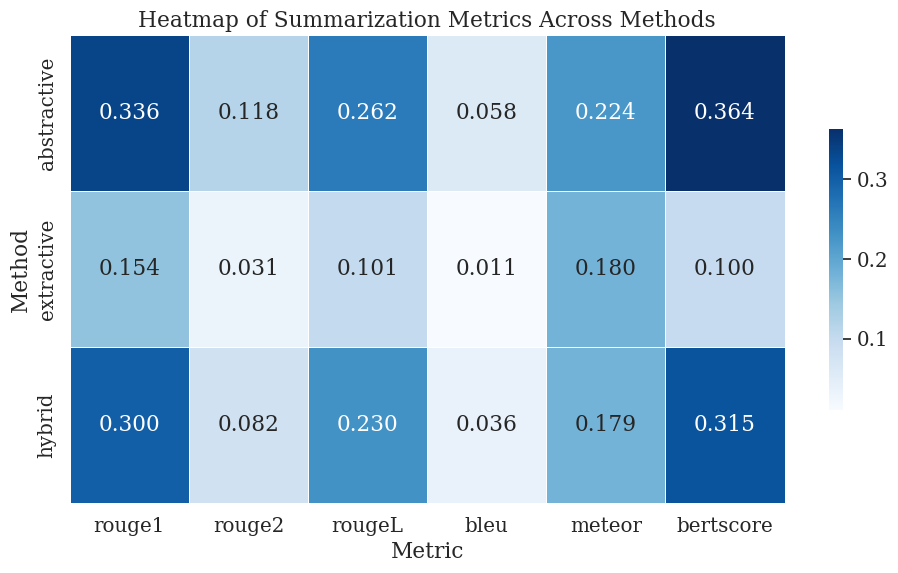

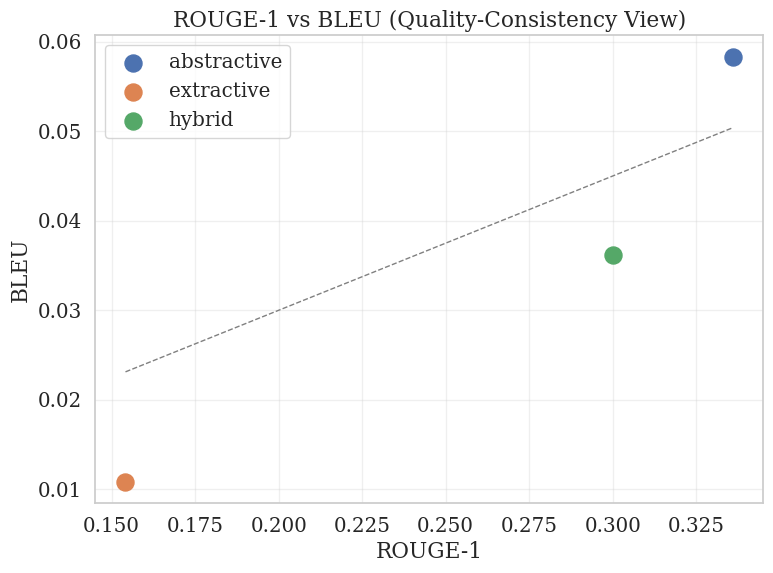

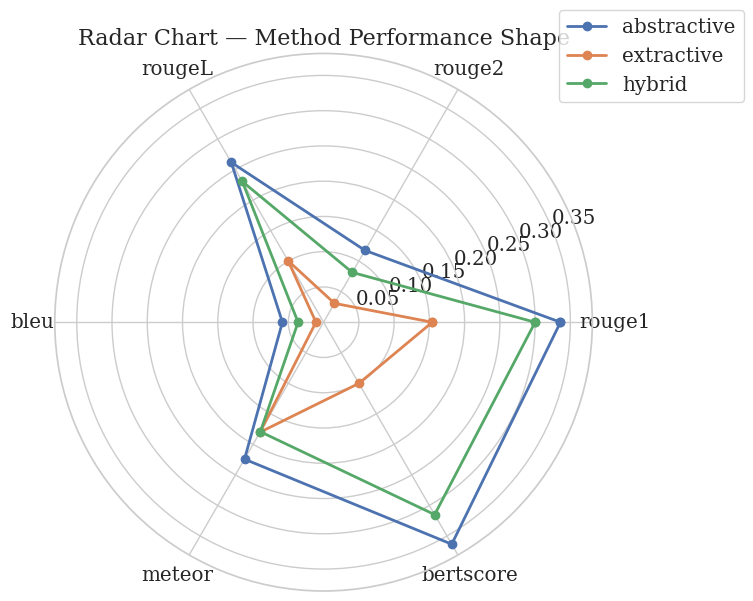

C:\Users\Aakash Borse\AppData\Local\Temp\ipykernel_21264\4004759023.py:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


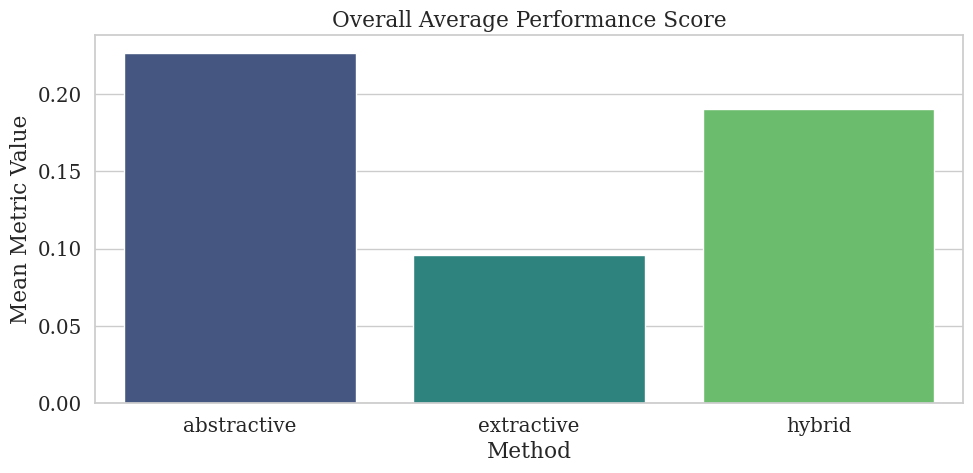


📘 Research-style plots generated successfully!


In [2]:
# =============================================================
#     📘 Research-Style Visualization Suite for Summarization
#       Extractive vs Hybrid vs Abstractive (XLSum Results)
# =============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------
# 0. Load results (CSV fallback)
# -----------------------------
try:
    df = results["df"]
    print("Loaded results from memory.")
except:
    print("⚠️ results not found — loading xlsum_results.csv")
    df = pd.read_csv("xlsum_results.csv")

agg = df.groupby("method").mean(numeric_only=True)
metrics = ["rouge1", "rouge2", "rougeL", "bleu", "meteor", "bertscore"]
methods = agg.index.tolist()

# Research-style theme
sns.set_theme(style="whitegrid", font_scale=1.3)
plt.rcParams["font.family"] = "serif"


# =============================================================
# 1️⃣ Heatmap — Metric Comparison (Research Style)
# =============================================================
plt.figure(figsize=(10, 6))
sns.heatmap(
    agg[metrics], 
    annot=True, 
    cmap="Blues", 
    fmt=".3f", 
    linewidths=.5,
    cbar_kws={"shrink": .6}
)
plt.title("Heatmap of Summarization Metrics Across Methods")
plt.ylabel("Method")
plt.xlabel("Metric")
plt.tight_layout()
plt.show()


# =============================================================
# 2️⃣ ROUGE-1 vs BLEU — Scatter Plot With Excellence Line
# =============================================================
plt.figure(figsize=(8, 6))

for method in methods:
    plt.scatter(
        agg.loc[method, "rouge1"],
        agg.loc[method, "bleu"],
        s=150,
        label=method,
    )

# Excellence line (high ROUGE, high BLEU)
x = np.linspace(agg["rouge1"].min(), agg["rouge1"].max(), 50)
plt.plot(x, x * 0.15, "--", color="gray", linewidth=1)

plt.title("ROUGE-1 vs BLEU (Quality-Consistency View)")
plt.xlabel("ROUGE-1")
plt.ylabel("BLEU")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


# =============================================================
# 3️⃣ Radar Chart — Multi-Metric Shape Comparison
# =============================================================
# Prepare angles
angles = np.linspace(0, 2 * np.pi, len(metrics), endpoint=False).tolist()
angles += angles[:1]

plt.figure(figsize=(8, 8))

for method in methods:
    values = agg.loc[method].tolist()
    values += values[:1]
    plt.polar(angles, values, marker='o', linewidth=2, label=method)

plt.xticks(angles[:-1], metrics)
plt.title("Radar Chart — Method Performance Shape", fontsize=16)
plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1))
plt.tight_layout()
plt.show()


# =============================================================
# 4️⃣ Performance Ranking — Clean Bar Plot
# =============================================================
plt.figure(figsize=(10, 5))

avg_scores = agg[metrics].mean(axis=1)

sns.barplot(
    x=avg_scores.index,
    y=avg_scores.values,
    palette="viridis"
)
plt.title("Overall Average Performance Score")
plt.ylabel("Mean Metric Value")
plt.xlabel("Method")
plt.tight_layout()
plt.show()

print("\n📘 Research-style plots generated successfully!")


In [19]:
import matplotlib.pyplot as plt
import numpy as np

def plot_clustering_metrics_individual(clustering_results):
    methods = list(clustering_results.keys())
    metrics = ["rouge1", "rouge2", "rougeL", "bleu", "meteor", "bertscore"]

    for metric in metrics:
        vals = []
        for method in methods:
            v = clustering_results[method].get(metric, None)
            vals.append(0.0 if v is None else v)

        x = np.arange(len(methods))

        plt.figure(figsize=(6, 4))
        plt.bar(x, vals)
        plt.xticks(x, methods, rotation=15)
        plt.ylabel("Score")
        plt.title(f"{metric.upper()} vs Clustering Method")
        plt.grid(axis="y", linestyle="--", alpha=0.4)
        plt.tight_layout()
        plt.show()


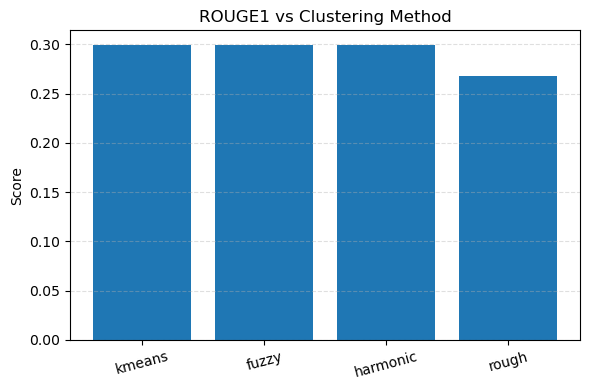

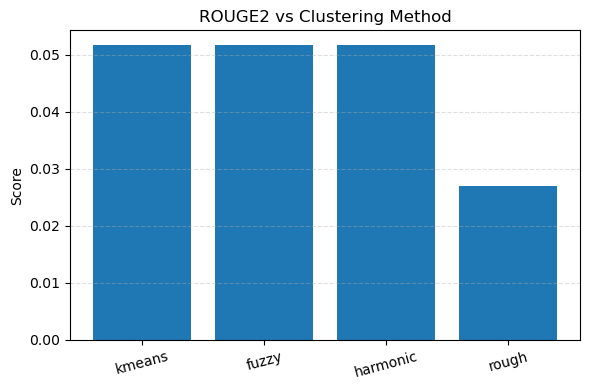

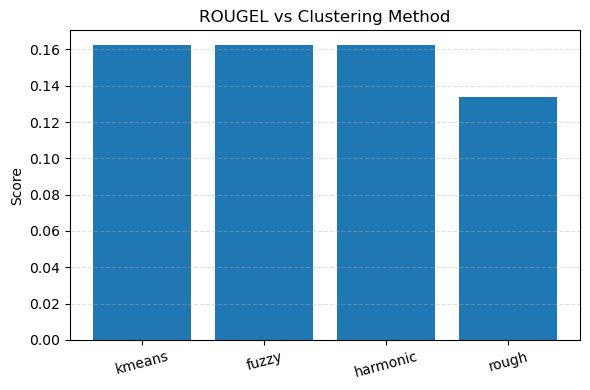

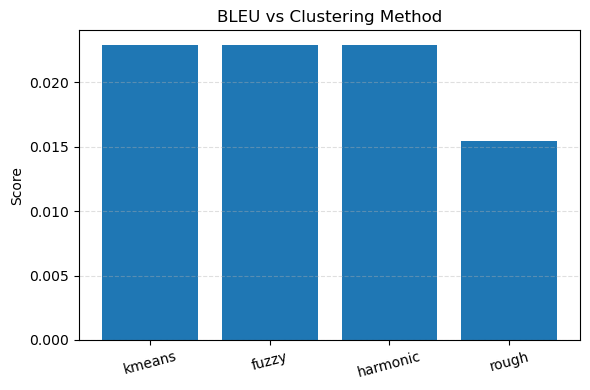

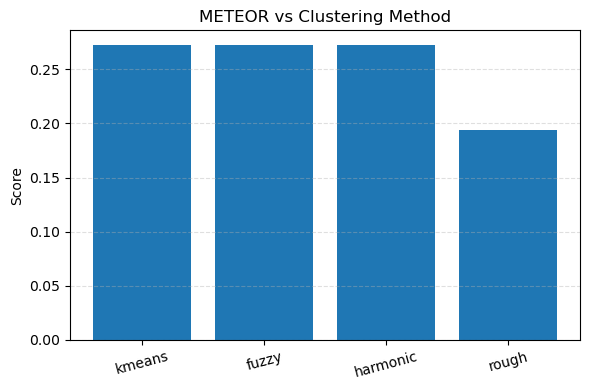

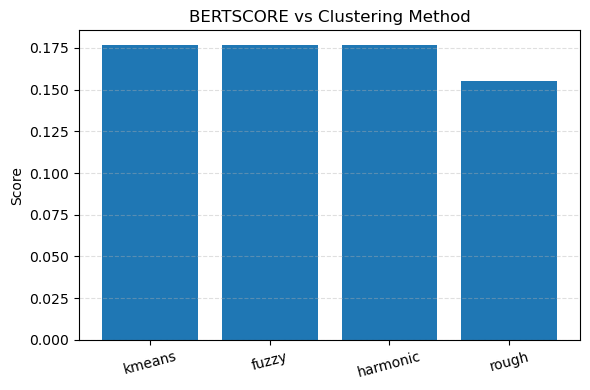

In [20]:
plot_clustering_metrics_individual(results)


In [ ]:
from gensumm.dataset_eval import evaluate_on_dataset

results = evaluate_on_dataset(
    dataset_name="csebuetnlp/xlsum",
    dataset_config="english",
    num_samples=100,
    abs_model_name="google/flan-t5-base",
    export_csv="xlsum_results.csv"
)



🔍 Loading Dataset: csebuetnlp/xlsum (english)


TypeError: string indices must be integers, not 'str'

In [13]:
import sys
sys.path.append(r"d:\Aakash\python Projects\Major Project\Major-Project\Multilingual-Extractive-Summarization-")


In [15]:
# from gensumm.dataset_eval import evaluate_on_dataset

# results = evaluate_on_dataset(
#     dataset_name="csebuetnlp/xlsum",
#     dataset_config="english",
#     num_samples=100,
#     abs_model_name="google/flan-t5-base",
#     export_csv="xlsum_results.csv"
# )

import inspect, gensumm.dataset_eval
print(inspect.getsource(gensumm.dataset_eval.evaluate_on_dataset))



def evaluate_on_dataset(
    dataset_name: str,
    dataset_config: str = None,
    num_samples: int = 200,
    abs_model_name: str = "google/flan-t5-base",
    compression_ratio: float = 0.2,
    lambda_param: float = 0.7,
    max_cap: int = 40,
    min_sentences: int = 3,
    lang: str = "en",
    export_csv: str = "results.csv",
) -> Dict[str, Any]:
    """
    Evaluate extractive, hybrid, and abstractive summarization over a dataset.

    Assumes the dataset has fields:
        - "text"    : document
        - "summary" : reference summary
    """

    print(f"\n🔍 Loading Dataset: {dataset_name} ({dataset_config})")
    ds = load_dataset(dataset_name, dataset_config)

    # We will work on the test split
    data = ds["test"].select(range(min(num_samples, len(ds["test"]))))

    abs_model = AbstractiveSummarizer(abs_model_name)
    rows = []

    for i, item in enumerate(data):
        print(f"\nProcessing sample {i+1}/{len(data)}")

        # XL-Sum fields: "text" and "summary"
  

In [16]:
import gensumm.dataset_eval
print(gensumm.dataset_eval.__file__)
print(inspect.getsource(gensumm.dataset_eval))


d:\Aakash\python Projects\Major Project\Major-Project\Multilingual-Extractive-Summarization-\gensumm\dataset_eval.py
# gensumm/dataset_eval.py

import numpy as np
import pandas as pd
from typing import Dict, Any

# ====== Local project imports (based on your folder structure) ======
from extractive.ex_summarizer import extractive_summary, split_sentences, embed_sentences
from extractive.clustering import CLUSTER_METHODS
from extractive.selector import build_summary_from_clusters
from abstractive.abs_summarizer import AbstractiveSummarizer

# ====== Metric libraries ======
from rouge_score import rouge_scorer
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from nltk.translate.meteor_score import meteor_score
from bert_score import score as bert_score

from datasets import load_dataset


# ------------------------- Metrics -------------------------

def compute_metrics(ref: str, gen: str, lang: str = "en") -> Dict[str, float]:
    scorer = rouge_scorer.RougeScorer(

In [17]:
print(evaluate_on_dataset.__module__)
print(evaluate_on_dataset)


gensumm.dataset_eval
<function evaluate_on_dataset at 0x0000020DA66FE020>
